## code to extract elevation for each municipality in Colombia
* golbal elevation map from WorldClim: https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_elev.zip
* Municipalities from DANE: https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/
* Built in google collab using R as language
* Authors: 
  - ** David Restrepo: dsrestrepo@unicauca.edu.co **
  - ** Dana Moukheiber: mdana3474@gmail.com **

In [1]:
#connect with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
#  install the libraries
install.packages("raster")
install.packages("maptools")
install.packages("rgdal")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘sp’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/sp_1.4-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1049195 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [4]:
%%R
# load the libraries
library(raster)
library(maptools)
library(rgdal)

R[write to console]: Loading required package: sp

R[write to console]: Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

R[write to console]: rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5



# data taken from:
* worldclim: https://www.worldclim.org/data/worldclim21.html

You'll find .zip file, when is unziped contains a folder with a .tif file, this is the map of the golbal elevation.

# Read Elevation Data

In [7]:
%%R
# Elevation
# Is a raster
map_elevation <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_elev (Unizipped)/wc2.1_2.5m_elev.tif")

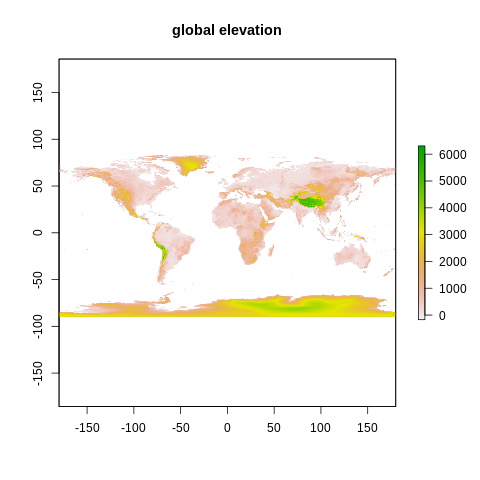

In [8]:
%%R
# The file looks like this:
plot(map_elevation, main = "global elevation")

OGR data source with driver: ESRI Shapefile 
Source: "/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp", layer: "MPM_FuenteCensal_2018"
with 1122 features
It has 53 fields


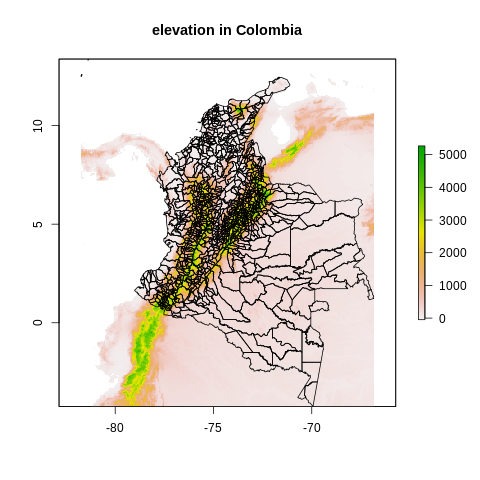

In [10]:
%%R
# we can crop the global map like this:
#load a polygon (municipalities)
colombian_map <- readOGR("/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp")

# cut map to obtain colombian map of elevation
colombia_map_elevation <- crop(map_elevation, colombian_map)
plot(colombia_map_elevation, main = "elevation in Colombia")
plot(colombian_map, add = TRUE)


# load the municipalities dataframe to take the value in each munucipality:
Data taken from:
* DANE: https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/

In [11]:
%%R
# Read coordinates csv
municipalities_df <- read.csv('/content/drive/MyDrive/Dengue_MAPS/polygons/DIVIPOLA_Municipios.csv', header = TRUE, sep = ";")

# Data preprocessing
municipalities_df = na.omit(municipalities_df)

#Fix DPTO names 
municipalities_df$NOM_DPTO = gsub("\xc1", "A", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xc9", "E", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xcd", "I", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xd3", "O", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xda", "U", municipalities_df$NOM_DPTO) 
municipalities_df$NOM_DPTO = gsub("\xd1", "N", municipalities_df$NOM_DPTO)

#Fix MPIO names
municipalities_df$NOM_MPIO = gsub("\xc1", "A", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xc9", "E", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xcd", "I", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xd3", "O", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xda", "U", municipalities_df$NOM_MPIO) # pendiente
municipalities_df$NOM_MPIO = gsub("\xd1", "N", municipalities_df$NOM_MPIO)


#Fix coordinates
#change , by .
municipalities_df$LONGITUD = gsub(",", ".", municipalities_df$LONGITUD)
municipalities_df$LATITUD = gsub(",", ".", municipalities_df$LATITUD)

#change coordinates from string to numeric
municipalities_df[,'LONGITUD'] = as.numeric(municipalities_df[,'LONGITUD'])
municipalities_df[,'LATITUD'] = as.numeric(municipalities_df[,'LATITUD'])
head(municipalities_df)

  COD_DPTO  NOM_DPTO COD_MPIO   NOM_MPIO      TIPO  LATITUD  LONGITUD
1        5 ANTIOQUIA     5001   MEDELLIN Municipio 6.257590 -75.61103
2        5 ANTIOQUIA     5002  ABEJORRAL Municipio 5.803728 -75.43847
3        5 ANTIOQUIA     5004   ABRIAQUI Municipio 6.627569 -76.08598
4        5 ANTIOQUIA     5021 ALEJANDRIA Municipio 6.365534 -75.09060
5        5 ANTIOQUIA     5030      AMAGA Municipio 6.032922 -75.70800
6        5 ANTIOQUIA     5031     AMALFI Municipio 6.977789 -74.98124


# Extract data of elevation

In [12]:
%%R

# Extracting data of elevation for each municipality 
elevation_aux_df = extract(map_elevation, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
# Append that data of elevation to municipalities
elevation_df = cbind(elevation_aux_df, municipalities_df)
# Rename
colnames(elevation_df)[2] = "Elevation"
# Delete the id column
elevation_df = subset (elevation_df, select = -ID)
head(elevation_df,10)


   Elevation COD_DPTO  NOM_DPTO COD_MPIO    NOM_MPIO      TIPO  LATITUD
1       1650        5 ANTIOQUIA     5001    MEDELLIN Municipio 6.257590
2       2150        5 ANTIOQUIA     5002   ABEJORRAL Municipio 5.803728
3       2162        5 ANTIOQUIA     5004    ABRIAQUI Municipio 6.627569
4       1612        5 ANTIOQUIA     5021  ALEJANDRIA Municipio 6.365534
5       1537        5 ANTIOQUIA     5030       AMAGA Municipio 6.032922
6       1351        5 ANTIOQUIA     5031      AMALFI Municipio 6.977789
7       2000        5 ANTIOQUIA     5034       ANDES Municipio 5.604993
8       1685        5 ANTIOQUIA     5036 ANGELOPOLIS Municipio 6.121430
9       2002        5 ANTIOQUIA     5038   ANGOSTURA Municipio 6.861499
10      1104        5 ANTIOQUIA     5040       ANORI Municipio 7.193111
    LONGITUD
1  -75.61103
2  -75.43847
3  -76.08598
4  -75.09060
5  -75.70800
6  -74.98124
7  -75.94128
8  -75.71595
9  -75.35832
10 -75.10849


# Download Data

In [13]:
%%R
# Download data 2007 - 2018
write.csv(elevation_df, "elevation.csv")